# Tutorial de Matplotlib: 3. Tipos de gráficos

Creado y traducido por [Pedro González Rodelas](https://www.ugr.es/~prodelas/) a partir de un notebook incluido en el siguiente [Tutorial de Matplotlib de astroML](http://jakevdp.github.io/mpl_tutorial/index.html)

         Última revisión: 09/04/2020

Hasta ahora nos hemos dedicado a producir gráficos simples, ya sea con lineas o puntos usando el comando ``plot``.
No obstante, hay una enorme variedad de tipos de gráficos disponibles en el módulo `matplotlib`, de los cuales aquí revisaremos alguno de los más usados. Una referencia excelente para repasar la mayoría de comandos y opciones puede ser [Resumen Comandos Gráficos](http://matplotlib.org/api/pyplot_summary.html) en la documentación de
`matplotlib`. Para revisar de manera más visual la extensa galería de gráficos disponibles, consultar [Galería](http://matplotlib.org/gallery.html).

In [1]:
# Como siempre, empezaremos importando los módulos habituales
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
# la opción de gráficos en línea parece ya ser la que viene por defecto en las
# nuevas versiones de Matplotlib dentro de un notebook de jupyter.

## Histogramas

Los histogramas, a través de la orden [`hist`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html) pueden usarse para juzgar la densidad de datos uni-dimensionales. Como cualquier comando o función de Matplotlib, podremos usar bastantes opciones, pero en el siguiente ejemplo tan sólo usaremos algunas de ellas, como el tipo de histograma (`histtype`), así como número de agrupamientos (`bins`) y el grado de transparencia (`alpha`) de los rellenos usados:

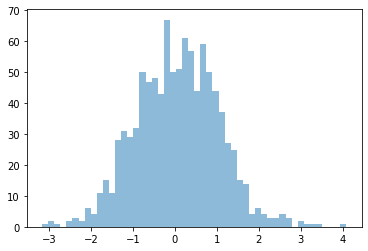

In [2]:
x = np.random.normal(size=1000)

fig, ax = plt.subplots()

H = ax.hist(x, bins=50, alpha=0.5, histtype='stepfilled')

## Gráficos de tipo tarta

`Matplotlib` puede crear gráfcos de tipo tarta con la función [``pie``](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html):

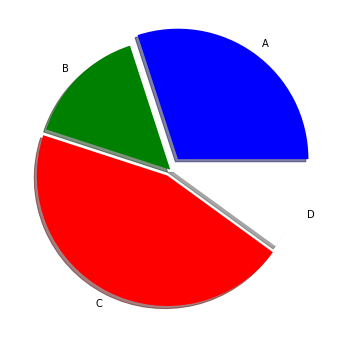

In [4]:
fraciones = [30, 15, 45, 10]
colores = ['b', 'g', 'r', 'w']

fig, ax = plt.subplots(figsize=(6, 6))  # genera el hueco para el gráfico
pie = ax.pie(fraciones, colors=colores, explode=(0.1, 0, 0.05, 0), shadow=True,
             labels=['A', 'B', 'C', 'D'])

## Gráficos de barras de error

A menudo queremos añadir barras de error a nuestros puntos. Para ellos la función [``errorbar``](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) trabaja de una manera similar a ``plot``, pero añade barras de error horizontales o verticales a dichos puntos.

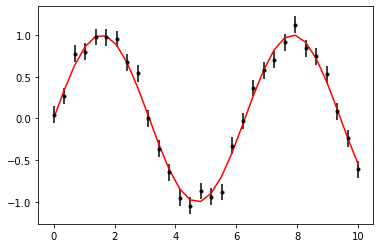

In [6]:
x = np.linspace(0, 10, 30)
dy = 0.1
y = np.sin(x)
ye = np.random.normal(y, dy)

fig, ax = plt.subplots()
ax.errorbar(x, ye, dy, fmt='.k')
ax.plot(x,y,'r-');

## Gráficas Rellenas 

Otras veces también queremos rellenar la región situada bajo una curva, o entre dos curvas; para ello, las funciones ``fill`` y ``fill_between`` pueden resultar muy útiles para ello:

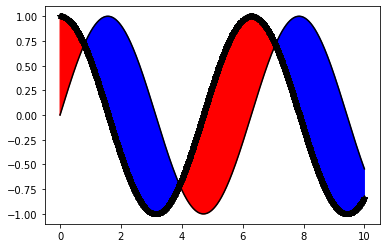

In [26]:
x = np.linspace(0, 10, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots()
ax.fill_between(x, y1, y2, where=(y1 < y2), color='red')
ax.fill_between(x, y1, y2, where=(y1 > y2), color='blue');

ax.plot(x,y1,'k-')
ax.plot(x,y2,'k*');

## Gráficos de dispersión

El comando [``scatter``](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html) permite muchas más flexibilidad que ``plot`` a la hora de indicar colores (a partir de un mapa concreto de colores [`cmap`](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)) y formas de los puntos a representar, etc.:

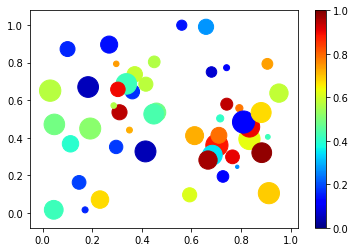

In [6]:
x = np.random.random(50)
y = np.random.random(50)
c = np.random.random(50)  # color de los puntos
s = 500 * np.random.random(50)  # tamaño de los puntos

fig, ax = plt.subplots()
im = ax.scatter(x, y, c=c, s=s, cmap=plt.cm.jet)

# Para añadir una barra de color
fig.colorbar(im, ax=ax)

# y para fijar los límites de colores
# que no sería necesario aquí, pero conviene saber cómo hacerlo.
im.set_clim(0.0, 1.0)

## Curvas de nivel

Las curvas de nivel pueden ser usadas para mostrar las variaciones de cierta cantidad (variable dependiente) respecto a otras dos (variables independientes). Las dos órdenes relacionadas con este tipo de gráficos son [``contour``](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html) y [``contourf``](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contourf.html):

In [33]:
x = np.linspace(0, 10, 50)
y = np.linspace(0, 20, 60)

In [34]:
x.shape

(50,)

In [35]:
np.shape(y)

(60,)

In [36]:
y

array([ 0.        ,  0.33898305,  0.6779661 ,  1.01694915,  1.3559322 ,
        1.69491525,  2.03389831,  2.37288136,  2.71186441,  3.05084746,
        3.38983051,  3.72881356,  4.06779661,  4.40677966,  4.74576271,
        5.08474576,  5.42372881,  5.76271186,  6.10169492,  6.44067797,
        6.77966102,  7.11864407,  7.45762712,  7.79661017,  8.13559322,
        8.47457627,  8.81355932,  9.15254237,  9.49152542,  9.83050847,
       10.16949153, 10.50847458, 10.84745763, 11.18644068, 11.52542373,
       11.86440678, 12.20338983, 12.54237288, 12.88135593, 13.22033898,
       13.55932203, 13.89830508, 14.23728814, 14.57627119, 14.91525424,
       15.25423729, 15.59322034, 15.93220339, 16.27118644, 16.61016949,
       16.94915254, 17.28813559, 17.62711864, 17.96610169, 18.30508475,
       18.6440678 , 18.98305085, 19.3220339 , 19.66101695, 20.        ])

In [37]:
y[:, np.newaxis]   # para convertir el array fila en array columna

array([[ 0.        ],
       [ 0.33898305],
       [ 0.6779661 ],
       [ 1.01694915],
       [ 1.3559322 ],
       [ 1.69491525],
       [ 2.03389831],
       [ 2.37288136],
       [ 2.71186441],
       [ 3.05084746],
       [ 3.38983051],
       [ 3.72881356],
       [ 4.06779661],
       [ 4.40677966],
       [ 4.74576271],
       [ 5.08474576],
       [ 5.42372881],
       [ 5.76271186],
       [ 6.10169492],
       [ 6.44067797],
       [ 6.77966102],
       [ 7.11864407],
       [ 7.45762712],
       [ 7.79661017],
       [ 8.13559322],
       [ 8.47457627],
       [ 8.81355932],
       [ 9.15254237],
       [ 9.49152542],
       [ 9.83050847],
       [10.16949153],
       [10.50847458],
       [10.84745763],
       [11.18644068],
       [11.52542373],
       [11.86440678],
       [12.20338983],
       [12.54237288],
       [12.88135593],
       [13.22033898],
       [13.55932203],
       [13.89830508],
       [14.23728814],
       [14.57627119],
       [14.91525424],
       [15

In [38]:
np.shape(y[:, np.newaxis])

(60, 1)

In [40]:
np.shape(y[:, np.newaxis]*x)

(60, 50)

In [41]:
z = np.sin(x)* np.cos(y[:, np.newaxis]) 

In [42]:
np.shape(z)

(60, 50)

In [43]:
X, Y = np.meshgrid(x,y)  # esta hubiera sido otra opción, imitando a MATLAB

In [44]:
X.shape, Y.shape

((60, 50), (60, 50))

In [45]:
Z = np.sin(X)*np.cos(Y)
Z.shape

(60, 50)

In [46]:
Z == z   # comprobemos que ambos arrays bidimensionales coinciden

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

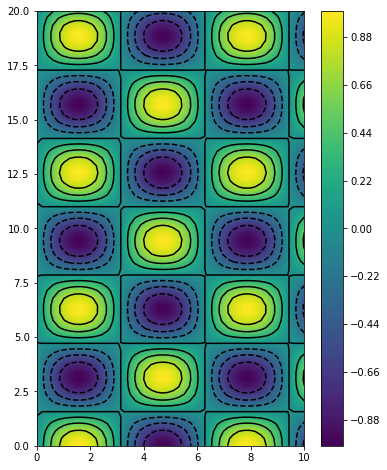

In [47]:
fig, ax = plt.subplots(figsize = (6,8))

# relleno de los contornos
im = ax.contourf(x, y, z, 100)

# líneas de nivel
im2 = ax.contour(x, y, z, colors='k')

fig.colorbar(im, ax=ax);

## Mostrando las imágenes

El comando ``imshow`` permite mostrar imágenes en una gran variedad de formatos. Puede ser también útil para poder visualizar datos reales como imágenes, o incluso para poder visualizarlos de una manera similar a las líneas de nivel vistos anteriormente.

In [48]:
I = np.random.random((100, 100)) # array bidimensional de NumPy
np.shape(I)

(100, 100)

In [49]:
np.sin(np.linspace(0, np.pi, 100)).shape  # array unidimensional de NumPy

(100,)

In [50]:
I += np.sin(np.linspace(0, np.pi, 100))  # aquí se aprovecha la posibilidad de
np.shape(I) # NumPy para operar adecuadamente mezclando arrays de distintas
# dimensiones, pero con la misma longitud (broadcasting en inglés). Consultar
#  https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

(100, 100)

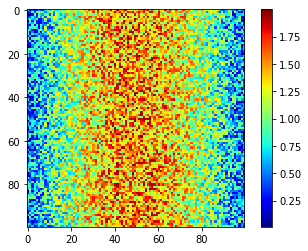

In [51]:
fig, ax = plt.subplots()

im = ax.imshow(I, cmap=plt.cm.jet)

fig.colorbar(im, ax=ax);

## Histogramas 2D y Hexbin

Los comandos [``hist2D``](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) y [``hexbin``](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hexbin.html) son dos maneras diferentes de representar datos bi-dimensionales recortados. Puede usarse como sigue:

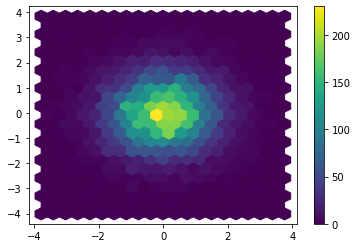

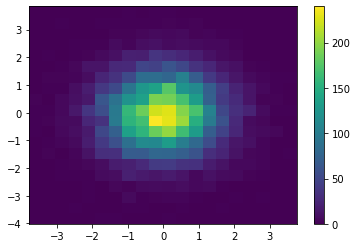

In [52]:
x, y = np.random.normal(size=(2, 10000))  # aquí estaríamos generando a la vez 
# dos arrays de números aleatorios siguiendo una distribución normal con 10000
# elementos cada uno y almacenándolos en las variables x e y, respectivamente.

fig, ax = plt.subplots()
im = ax.hexbin(x, y, gridsize=20) # en este caso hexbin contabiliza puntos 
fig.colorbar(im, ax=ax)           # a partir de pequeños hexágonos en el plano

fig, ax = plt.subplots()
H = ax.hist2d(x, y, bins=20)
fig.colorbar(H[3], ax=ax); # estaríamos usando la tercera componente 
# para generar los valores de la correspondiente barra de color.

Si nos fijamos un poco mejor en el código anterior, vemos que se han generado dos figuras con un sólo eje cada una, aunque las hemos llamado de la misma forma, y se ha representado una tras la otra, machacando a la primera. Así pues si ahora le pedimos que nos muestra la figura, sólo podrá mostrarnos la segunda.

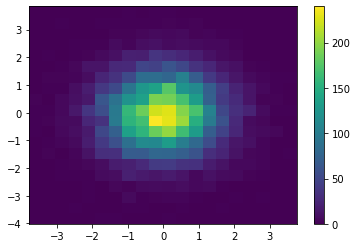

In [53]:
fig    # vemos que sólo la segunda gráfica se ha quedado guardada

Otra opción, con lo que ya sabemos sobre el comando `subplots`, hubiera sido generar una sóla figura con dos ejes incluidos en ella.

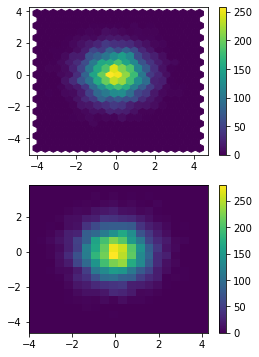

In [54]:
x, y = np.random.normal(size=(2, 10000))

fig, ax = plt.subplots(2,1, figsize = (4,6))

im = ax[0].hexbin(x, y, gridsize=20)
fig.colorbar(im, ax=ax[0])

H = ax[1].hist2d(x, y, bins=20)
fig.colorbar(H[3], ax=ax[1]);

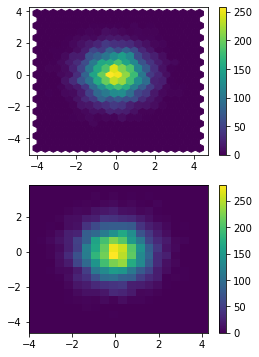

In [55]:
fig  # comprobamos que ahora sí que se han guardado ambas gráficas

## Gráficos en coordenadas polares 

También es posible dibujar datos y gráficas en coordenadas no necesariamente cartesianas, como por ejemplo en polares.

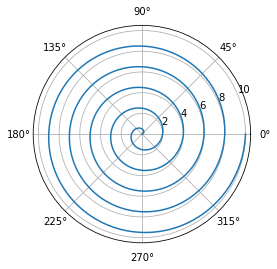

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='polar')
                    
theta = np.linspace(0, 10 * np.pi, 1000)
r = np.linspace(0, 10, 1000)

ax.plot(theta, r);

Llegados a este punto, no deje de repasar la mayoría de comandos y múltiples opciones en la documentación de
`matplotlib` [Resumen Comandos Gráficos](http://matplotlib.org/api/pyplot_summary.html), así como revisar de manera más visual la extensa galería de gráficos disponibles en la correspondient [Galería](http://matplotlib.org/gallery.html).